## run random forest model

In [ ]:
#C:\Users\there\Downloads\climate_projections.csv
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


In [ ]:
file_path = r"climate_projections.csv"
cleaned_data = pd.read_csv(file_path)
cleaned_data

,Unnamed: 0.1,Unnamed: 0,latitude_degrees,longitude_degrees,date,depth_m,ocean_name,country_name,city_town_name,distance_to_shore,...,overfishing,coastal_dev,marine_pollution,hard_coral_class,sst_mean_2030,sst_mean_2035,sst_mean_2040,windspeed_2030,windspeed_2035,windspeed_2040
0,0,5342,-28.8645,114.0012,2005-09-13,11.0,Indian,Australia,Houtman Abrolhos Islands,9.47,...,100,0,0,Fair,295.223138,295.321940,295.395829,7.767943,7.753555,7.687996
1,1,11207,-28.1625,153.5311,2016-04-19,4.0,Pacific,Australia,Gold Coast,407.22,...,0,0,0,Poor,297.122309,297.210654,297.272631,4.591059,4.595985,4.593274
2,2,11240,-28.1092,153.4758,2017-03-27,12.0,Pacific,Australia,Gold Coast,730.91,...,0,0,0,Poor,297.052269,297.140406,297.202843,4.278165,4.282283,4.278747
3,3,11245,-28.0411,153.4536,2017-05-22,24.0,Pacific,Australia,Gold Coast,1489.72,...,0,0,0,Poor,297.030668,297.118548,297.181387,4.231962,4.235794,4.231380
4,4,11208,-27.9867,153.4334,2016-04-19,6.0,Pacific,Australia,Gold Coast,271.59,...,0,0,0,Poor,297.010528,297.098202,297.161371,4.179720,4.183285,4.178161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,4288,504,34.0525,139.4836,2008-11-08,5.0,Pacific,Japan,Izu Islands,76.53,...,100,0,0,Good,295.429439,295.503757,295.511759,7.968651,7.961594,7.989487
4289,4289,526,34.0561,139.4811,2014-07-05,5.0,Pacific,Japan,Izu Islands,37.40,...,100,0,0,Good,295.421842,295.496033,295.503948,7.967477,7.960447,7.988312
4290,4290,525,34.0975,139.4850,2014-07-05,10.0,Pacific,Japan,Izu Islands,258.70,...,100,0,0,Fair,295.360648,295.433830,295.440888,7.950556,7.943788,7.971381
4291,4291,495,34.0981,139.4864,2005-10-01,9.0,Pacific,Japan,Izu Islands,132.86,...,100,0,0,Fair,295.360880,295.434067,295.441118,7.950161,7.943394,7.970986


In [ ]:
# List of columns to keep
columns_to_keep = ['turbidity', 'cyclone_frequency', 'climsst',
                   'temperature_kelvin', 'windspeed', 'ssta_minimum',
                   'ssta_maximum', 'nutrient_indicator_algae',
                   'hard_coral_class', 'latitude_degrees', 'longitude_degrees']

# Filter DataFrame to keep only the specified columns
historical_data = cleaned_data[columns_to_keep]
historical_data

,turbidity,cyclone_frequency,climsst,temperature_kelvin,windspeed,ssta_minimum,ssta_maximum,nutrient_indicator_algae,hard_coral_class,latitude_degrees,longitude_degrees
0,0.0638,45.60,293.23,293.00,6.0,-2.84,5.01,36.25,Fair,-28.8645,114.0012
1,0.0935,44.56,295.64,298.19,3.0,-2.79,2.98,6.25,Poor,-28.1625,153.5311
2,0.1064,44.56,296.61,299.64,7.0,-2.42,2.48,4.38,Poor,-28.1092,153.4758
3,0.0000,44.10,293.91,296.04,3.0,-2.59,2.30,3.75,Poor,-28.0411,153.4536
4,0.1249,43.35,295.37,297.83,3.0,-3.29,2.72,43.75,Poor,-27.9867,153.4334
...,...,...,...,...,...,...,...,...,...,...,...
4288,0.0543,58.97,292.90,296.60,10.0,-4.60,4.12,0.62,Good,34.0525,139.4836
4289,0.0543,58.97,299.94,297.58,6.0,-4.60,4.12,1.88,Good,34.0561,139.4811
4290,0.0553,58.82,262.15,297.81,6.0,-4.72,3.97,20.62,Fair,34.0975,139.4850
4291,0.0553,58.82,262.15,297.44,5.0,-4.72,3.97,0.00,Fair,34.0981,139.4864


In [ ]:
# Replace values in 'hard_coral_class'
historical_data['hard_coral_class'] = historical_data['hard_coral_class'].replace({
    'Poor': 'Unhealthy',
    'Fair': 'Healthy',
    'Good': 'Healthy'
})

# Display the first few rows to verify the change
historical_data

<ipython-input-4-2987e2ab13d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historical_data['hard_coral_class'] = historical_data['hard_coral_class'].replace({


,turbidity,cyclone_frequency,climsst,temperature_kelvin,windspeed,ssta_minimum,ssta_maximum,nutrient_indicator_algae,hard_coral_class,latitude_degrees,longitude_degrees
0,0.0638,45.60,293.23,293.00,6.0,-2.84,5.01,36.25,Healthy,-28.8645,114.0012
1,0.0935,44.56,295.64,298.19,3.0,-2.79,2.98,6.25,Unhealthy,-28.1625,153.5311
2,0.1064,44.56,296.61,299.64,7.0,-2.42,2.48,4.38,Unhealthy,-28.1092,153.4758
3,0.0000,44.10,293.91,296.04,3.0,-2.59,2.30,3.75,Unhealthy,-28.0411,153.4536
4,0.1249,43.35,295.37,297.83,3.0,-3.29,2.72,43.75,Unhealthy,-27.9867,153.4334
...,...,...,...,...,...,...,...,...,...,...,...
4288,0.0543,58.97,292.90,296.60,10.0,-4.60,4.12,0.62,Healthy,34.0525,139.4836
4289,0.0543,58.97,299.94,297.58,6.0,-4.60,4.12,1.88,Healthy,34.0561,139.4811
4290,0.0553,58.82,262.15,297.81,6.0,-4.72,3.97,20.62,Healthy,34.0975,139.4850
4291,0.0553,58.82,262.15,297.44,5.0,-4.72,3.97,0.00,Healthy,34.0981,139.4864


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = historical_data.drop(columns=['hard_coral_class'])
y = historical_data['hard_coral_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict using the trained model
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7462


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## run grid search later

In [ ]:
# Assuming 'hard_coral_class' is the target variable and the rest are features
X = historical_data.drop(columns=['hard_coral_class'])
y = historical_data['hard_coral_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {grid_search.best_params_}")

# Predict using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

## prepare projected_data

In [ ]:
# List of columns to keep
columns_to_keep = ['sst_mean_2030', 'sst_mean_2035',
                   'sst_mean_2040', 'windspeed_2030',
                   'windspeed_2035', 'windspeed_2040',
                   'latitude_degrees', 'longitude_degrees']

# Filter DataFrame to keep only the specified columns
projected_data = cleaned_data[columns_to_keep]
projected_data

,sst_mean_2030,sst_mean_2035,sst_mean_2040,windspeed_2030,windspeed_2035,windspeed_2040,latitude_degrees,longitude_degrees
0,295.223138,295.321940,295.395829,7.767943,7.753555,7.687996,-28.8645,114.0012
1,297.122309,297.210654,297.272631,4.591059,4.595985,4.593274,-28.1625,153.5311
2,297.052269,297.140406,297.202843,4.278165,4.282283,4.278747,-28.1092,153.4758
3,297.030668,297.118548,297.181387,4.231962,4.235794,4.231380,-28.0411,153.4536
4,297.010528,297.098202,297.161371,4.179720,4.183285,4.178161,-27.9867,153.4334
...,...,...,...,...,...,...,...,...
4288,295.429439,295.503757,295.511759,7.968651,7.961594,7.989487,34.0525,139.4836
4289,295.421842,295.496033,295.503948,7.967477,7.960447,7.988312,34.0561,139.4811
4290,295.360648,295.433830,295.440888,7.950556,7.943788,7.971381,34.0975,139.4850
4291,295.360880,295.434067,295.441118,7.950161,7.943394,7.970986,34.0981,139.4864


In [ ]:
projected_data['turbidity'] = pd.NA
projected_data['cyclone_frequency'] = pd.NA
projected_data['climsst'] = pd.NA
projected_data['nutrient_indicator_algae'] = pd.NA
projected_data['ssta_maximum'] = pd.NA
projected_data['ssta_minimum'] = pd.NA

<ipython-input-7-845669e94af3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_data['turbidity'] = pd.NA
<ipython-input-7-845669e94af3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_data['cyclone_frequency'] = pd.NA
<ipython-input-7-845669e94af3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
projected_data

,sst_mean_2030,sst_mean_2035,sst_mean_2040,windspeed_2030,windspeed_2035,windspeed_2040,latitude_degrees,longitude_degrees,turbidity,cyclone_frequency,climsst,nutrient_indicator_algae,ssta_maximum,ssta_minimum
0,295.223138,295.321940,295.395829,7.767943,7.753555,7.687996,-28.8645,114.0012,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,297.122309,297.210654,297.272631,4.591059,4.595985,4.593274,-28.1625,153.5311,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,297.052269,297.140406,297.202843,4.278165,4.282283,4.278747,-28.1092,153.4758,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,297.030668,297.118548,297.181387,4.231962,4.235794,4.231380,-28.0411,153.4536,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,297.010528,297.098202,297.161371,4.179720,4.183285,4.178161,-27.9867,153.4334,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,295.429439,295.503757,295.511759,7.968651,7.961594,7.989487,34.0525,139.4836,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4289,295.421842,295.496033,295.503948,7.967477,7.960447,7.988312,34.0561,139.4811,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4290,295.360648,295.433830,295.440888,7.950556,7.943788,7.971381,34.0975,139.4850,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4291,295.360880,295.434067,295.441118,7.950161,7.943394,7.970986,34.0981,139.4864,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
# Perform a left merge to align historical data based on latitude and longitude
merged_data = projected_data.merge(
    historical_data[['latitude_degrees', 'longitude_degrees', 'turbidity', 'cyclone_frequency',
                     'nutrient_indicator_algae', 'ssta_maximum', 'ssta_minimum']],
    on=['latitude_degrees', 'longitude_degrees'],
    how='left',
    suffixes=('', '_historical')
)

# Fill missing values in the projected data with corresponding historical values
for col in ['turbidity', 'cyclone_frequency',
            'nutrient_indicator_algae', 'ssta_maximum', 'ssta_minimum']:
    merged_data[col] = merged_data[col].fillna(merged_data[f"{col}_historical"])

# Drop the additional historical columns used for filling
merged_data.drop(columns=[f"{col}_historical" for col in ['turbidity', 'cyclone_frequency',
                                                          'nutrient_indicator_algae',
                                                          'ssta_maximum', 'ssta_minimum']], inplace=True)

# Verify missing values after filling
print("Remaining missing values per column:")
print(merged_data.isnull().sum())


Remaining missing values per column:
sst_mean_2030                  0
sst_mean_2035                  0
sst_mean_2040                  0
windspeed_2030                53
windspeed_2035                53
windspeed_2040                53
latitude_degrees               0
longitude_degrees              0
turbidity                      0
cyclone_frequency              0
climsst                     4293
nutrient_indicator_algae       0
ssta_maximum                   0
ssta_minimum                   0
dtype: int64


<ipython-input-9-bda8de220a2c>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data[col] = merged_data[col].fillna(merged_data[f"{col}_historical"])


In [ ]:
# Perform a left merge to align historical windspeed data with projected data
merged_windspeed = merged_data.merge(
    historical_data[['latitude_degrees', 'longitude_degrees', 'windspeed']],
    on=['latitude_degrees', 'longitude_degrees'],
    how='left',
    suffixes=('', '_historical')
)

# Fill missing values in projected windspeed columns with historical windspeed
for col in ['windspeed_2030', 'windspeed_2035', 'windspeed_2040']:
    merged_windspeed[col] = merged_windspeed[col].fillna(merged_windspeed['windspeed'])

# Drop the historical windspeed column used for filling (optional)
merged_windspeed.drop(columns=['windspeed'], inplace=True)

# Verify missing values after filling
print("Remaining missing values per column:")
print(merged_windspeed.isnull().sum())


Remaining missing values per column:
sst_mean_2030                  0
sst_mean_2035                  0
sst_mean_2040                  0
windspeed_2030                 0
windspeed_2035                 0
windspeed_2040                 0
latitude_degrees               0
longitude_degrees              0
turbidity                      0
cyclone_frequency              0
climsst                     4293
nutrient_indicator_algae       0
ssta_maximum                   0
ssta_minimum                   0
dtype: int64


In [ ]:
# Create new columns and assign values from corresponding sst_mean columns
merged_windspeed['clim_sst_2030'] = merged_windspeed['sst_mean_2030']
merged_windspeed['clim_sst_2035'] = merged_windspeed['sst_mean_2035']
merged_windspeed['clim_sst_2040'] = merged_windspeed['sst_mean_2040']

In [ ]:
# Drop the 'climsst' column from the DataFrame
merged_windspeed = merged_windspeed.drop(columns=['climsst'])
merged_windspeed

,sst_mean_2030,sst_mean_2035,sst_mean_2040,windspeed_2030,windspeed_2035,windspeed_2040,latitude_degrees,longitude_degrees,turbidity,cyclone_frequency,nutrient_indicator_algae,ssta_maximum,ssta_minimum,clim_sst_2030,clim_sst_2035,clim_sst_2040
0,295.223138,295.321940,295.395829,7.767943,7.753555,7.687996,-28.8645,114.0012,0.0638,45.60,36.25,5.01,-2.84,295.223138,295.321940,295.395829
1,297.122309,297.210654,297.272631,4.591059,4.595985,4.593274,-28.1625,153.5311,0.0935,44.56,6.25,2.98,-2.79,297.122309,297.210654,297.272631
2,297.052269,297.140406,297.202843,4.278165,4.282283,4.278747,-28.1092,153.4758,0.1064,44.56,4.38,2.48,-2.42,297.052269,297.140406,297.202843
3,297.030668,297.118548,297.181387,4.231962,4.235794,4.231380,-28.0411,153.4536,0.0000,44.10,3.75,2.30,-2.59,297.030668,297.118548,297.181387
4,297.010528,297.098202,297.161371,4.179720,4.183285,4.178161,-27.9867,153.4334,0.1249,43.35,43.75,2.72,-3.29,297.010528,297.098202,297.161371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,295.429439,295.503757,295.511759,7.968651,7.961594,7.989487,34.0525,139.4836,0.0543,58.97,0.62,4.12,-4.60,295.429439,295.503757,295.511759
4289,295.421842,295.496033,295.503948,7.967477,7.960447,7.988312,34.0561,139.4811,0.0543,58.97,1.88,4.12,-4.60,295.421842,295.496033,295.503948
4290,295.360648,295.433830,295.440888,7.950556,7.943788,7.971381,34.0975,139.4850,0.0553,58.82,20.62,3.97,-4.72,295.360648,295.433830,295.440888
4291,295.360880,295.434067,295.441118,7.950161,7.943394,7.970986,34.0981,139.4864,0.0553,58.82,0.00,3.97,-4.72,295.360880,295.434067,295.441118


In [ ]:
projected_data_2030 = merged_windspeed[['sst_mean_2030', 'windspeed_2030', 'clim_sst_2030',
                                     'latitude_degrees', 'longitude_degrees',
                                     'turbidity', 'cyclone_frequency', 'ssta_minimum',
                               'nutrient_indicator_algae', 'ssta_maximum']]

projected_data_2035 = merged_windspeed[['sst_mean_2035', 'windspeed_2035', 'clim_sst_2035',
                                     'latitude_degrees', 'longitude_degrees',
                                     'turbidity', 'cyclone_frequency', 'ssta_minimum',
                               'nutrient_indicator_algae', 'ssta_maximum']]

projected_data_2040 = merged_windspeed[['sst_mean_2040', 'windspeed_2040', 'clim_sst_2040',
                                     'latitude_degrees', 'longitude_degrees',
                                     'turbidity', 'cyclone_frequency', 'ssta_minimum',
                               'nutrient_indicator_algae', 'ssta_maximum']]

In [ ]:
# Rename specific columns
projected_data_2030.rename(columns={'sst_mean_2030': 'temperature_kelvin',
                   'windspeed_2030': 'windspeed',
                   'clim_sst_2030': 'climsst'}, inplace=True)
projected_data_2035.rename(columns={'sst_mean_2035': 'temperature_kelvin',
                   'windspeed_2035': 'windspeed',
                   'clim_sst_2035': 'climsst'}, inplace=True)
projected_data_2040.rename(columns={'sst_mean_2040': 'temperature_kelvin',
                   'windspeed_2040': 'windspeed',
                   'clim_sst_2040': 'climsst'}, inplace=True)


<ipython-input-14-37356c8cc669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_data_2030.rename(columns={'sst_mean_2030': 'temperature_kelvin',
<ipython-input-14-37356c8cc669>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_data_2035.rename(columns={'sst_mean_2035': 'temperature_kelvin',
<ipython-input-14-37356c8cc669>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projected_data_2040.rename(columns={'sst_mean_

## run actual random forest model

In [ ]:
import pickle

file_path_model = r'small_rf_model2.pkl'

with open(file_path_model, 'rb') as file:
    rf_loaded = pickle.load(file)

## Prediction for 2030

In [ ]:
projected_data_2030

,temperature_kelvin,windspeed,climsst,latitude_degrees,longitude_degrees,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum
0,295.223138,7.767943,295.223138,-28.8645,114.0012,0.0638,45.60,-2.84,36.25,5.01
1,297.122309,4.591059,297.122309,-28.1625,153.5311,0.0935,44.56,-2.79,6.25,2.98
2,297.052269,4.278165,297.052269,-28.1092,153.4758,0.1064,44.56,-2.42,4.38,2.48
3,297.030668,4.231962,297.030668,-28.0411,153.4536,0.0000,44.10,-2.59,3.75,2.30
4,297.010528,4.179720,297.010528,-27.9867,153.4334,0.1249,43.35,-3.29,43.75,2.72
...,...,...,...,...,...,...,...,...,...,...
4288,295.429439,7.968651,295.429439,34.0525,139.4836,0.0543,58.97,-4.60,0.62,4.12
4289,295.421842,7.967477,295.421842,34.0561,139.4811,0.0543,58.97,-4.60,1.88,4.12
4290,295.360648,7.950556,295.360648,34.0975,139.4850,0.0553,58.82,-4.72,20.62,3.97
4291,295.360880,7.950161,295.360880,34.0981,139.4864,0.0553,58.82,-4.72,0.00,3.97


In [ ]:
# Perform the merge to add the columns
projected_data_2030 = projected_data_2030.merge(
    cleaned_data[['latitude_degrees', 'longitude_degrees', 'distance_to_shore', 'depth_m']],
    on=['latitude_degrees', 'longitude_degrees'],
    how='left'
)

In [ ]:
projected_data_2030_model = projected_data_2030.drop(columns=['latitude_degrees', 'longitude_degrees'])
projected_data_2030_model

,temperature_kelvin,windspeed,climsst,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum,distance_to_shore,depth_m
0,295.223138,7.767943,295.223138,0.0638,45.60,-2.84,36.25,5.01,9.47,11.0
1,297.122309,4.591059,297.122309,0.0935,44.56,-2.79,6.25,2.98,407.22,4.0
2,297.052269,4.278165,297.052269,0.1064,44.56,-2.42,4.38,2.48,730.91,12.0
3,297.030668,4.231962,297.030668,0.0000,44.10,-2.59,3.75,2.30,1489.72,24.0
4,297.010528,4.179720,297.010528,0.1249,43.35,-3.29,43.75,2.72,271.59,6.0
...,...,...,...,...,...,...,...,...,...,...
4288,295.429439,7.968651,295.429439,0.0543,58.97,-4.60,0.62,4.12,76.53,5.0
4289,295.421842,7.967477,295.421842,0.0543,58.97,-4.60,1.88,4.12,37.40,5.0
4290,295.360648,7.950556,295.360648,0.0553,58.82,-4.72,20.62,3.97,258.70,10.0
4291,295.360880,7.950161,295.360880,0.0553,58.82,-4.72,0.00,3.97,132.86,9.0


In [ ]:
# Check for missing values in the entire DataFrame
missing_values_summary = projected_data_2030_model.isnull().sum()

# Print the summary of missing values
print("Missing values in projected_data_2030:")
print(missing_values_summary)

Missing values in projected_data_2030:
temperature_kelvin          0
windspeed                   0
climsst                     0
turbidity                   0
cyclone_frequency           0
ssta_minimum                0
nutrient_indicator_algae    0
ssta_maximum                0
distance_to_shore           0
depth_m                     0
dtype: int64


In [ ]:
trained_features = ['depth_m', 'distance_to_shore', 'turbidity', 'cyclone_frequency',
                    'climsst', 'temperature_kelvin', 'windspeed', 'ssta_minimum',
                    'ssta_maximum', 'nutrient_indicator_algae']
projected_data_2030_model = projected_data_2030_model[trained_features]

In [ ]:
predictions_2030 = rf_loaded.predict(projected_data_2030_model)
predictions_2030

array(['poor', 'poor', 'poor', ..., 'good', 'good', 'good'], dtype=object)

In [ ]:
import numpy as np

# Count occurrences of each class
healthy_count_2030 = np.sum(predictions_2030 == 'good')  # Healthy
unhealthy_count_2030 = np.sum(predictions_2030 == 'poor')  # Unhealthy

# Print the counts
print(f"Number of Healthy Predictions: {healthy_count_2030}")
print(f"Number of Unhealthy Predictions: {unhealthy_count_2030}")

Number of Healthy Predictions: 3132
Number of Unhealthy Predictions: 1161


In [ ]:
probabilities_2030 = rf_loaded.predict_proba(projected_data_2030_model)
probabilities_2030  # Shows probabilities for each class

array([[0.45579482, 0.54420518],
       [0.21234788, 0.78765212],
       [0.274     , 0.726     ],
       ...,
       [0.93874121, 0.06125879],
       [0.90902574, 0.09097426],
       [0.93051967, 0.06948033]])

In [ ]:
# Create a DataFrame from predictions and assign column name
predictions_2030_df = pd.DataFrame(predictions_2030, columns=['predicted_health_2030'])

# Combine predictions with latitude and longitude from projected_data_2030
results_forecast = pd.concat([projected_data_2030[['latitude_degrees', 'longitude_degrees']].reset_index(drop=True),
                          predictions_2030_df], axis=1)

# Display the resulting DataFrame
results_forecast


,latitude_degrees,longitude_degrees,predicted_health_2030
0,-28.8645,114.0012,poor
1,-28.1625,153.5311,poor
2,-28.1092,153.4758,poor
3,-28.0411,153.4536,poor
4,-27.9867,153.4334,poor
...,...,...,...
4288,34.0525,139.4836,good
4289,34.0561,139.4811,good
4290,34.0975,139.4850,good
4291,34.0981,139.4864,good


## Prediction for 2035

In [ ]:
projected_data_2035

,temperature_kelvin,windspeed,climsst,latitude_degrees,longitude_degrees,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum
0,295.321940,7.753555,295.321940,-28.8645,114.0012,0.0638,45.60,-2.84,36.25,5.01
1,297.210654,4.595985,297.210654,-28.1625,153.5311,0.0935,44.56,-2.79,6.25,2.98
2,297.140406,4.282283,297.140406,-28.1092,153.4758,0.1064,44.56,-2.42,4.38,2.48
3,297.118548,4.235794,297.118548,-28.0411,153.4536,0.0000,44.10,-2.59,3.75,2.30
4,297.098202,4.183285,297.098202,-27.9867,153.4334,0.1249,43.35,-3.29,43.75,2.72
...,...,...,...,...,...,...,...,...,...,...
4288,295.503757,7.961594,295.503757,34.0525,139.4836,0.0543,58.97,-4.60,0.62,4.12
4289,295.496033,7.960447,295.496033,34.0561,139.4811,0.0543,58.97,-4.60,1.88,4.12
4290,295.433830,7.943788,295.433830,34.0975,139.4850,0.0553,58.82,-4.72,20.62,3.97
4291,295.434067,7.943394,295.434067,34.0981,139.4864,0.0553,58.82,-4.72,0.00,3.97


In [ ]:
# Perform the merge to add the columns
projected_data_2035 = projected_data_2035.merge(
    cleaned_data[['latitude_degrees', 'longitude_degrees', 'distance_to_shore', 'depth_m']],
    on=['latitude_degrees', 'longitude_degrees'],
    how='left'
)

In [ ]:
projected_data_2035_model = projected_data_2035.drop(columns=['latitude_degrees', 'longitude_degrees'])
projected_data_2035_model

,temperature_kelvin,windspeed,climsst,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum,distance_to_shore,depth_m
0,295.321940,7.753555,295.321940,0.0638,45.60,-2.84,36.25,5.01,9.47,11.0
1,297.210654,4.595985,297.210654,0.0935,44.56,-2.79,6.25,2.98,407.22,4.0
2,297.140406,4.282283,297.140406,0.1064,44.56,-2.42,4.38,2.48,730.91,12.0
3,297.118548,4.235794,297.118548,0.0000,44.10,-2.59,3.75,2.30,1489.72,24.0
4,297.098202,4.183285,297.098202,0.1249,43.35,-3.29,43.75,2.72,271.59,6.0
...,...,...,...,...,...,...,...,...,...,...
4288,295.503757,7.961594,295.503757,0.0543,58.97,-4.60,0.62,4.12,76.53,5.0
4289,295.496033,7.960447,295.496033,0.0543,58.97,-4.60,1.88,4.12,37.40,5.0
4290,295.433830,7.943788,295.433830,0.0553,58.82,-4.72,20.62,3.97,258.70,10.0
4291,295.434067,7.943394,295.434067,0.0553,58.82,-4.72,0.00,3.97,132.86,9.0


In [ ]:
# Check for missing values in the entire DataFrame
missing_values_summary = projected_data_2035_model.isnull().sum()

# Print the summary of missing values
print("Missing values in projected_data_2035:")
print(missing_values_summary)

Missing values in projected_data_2035:
temperature_kelvin          0
windspeed                   0
climsst                     0
turbidity                   0
cyclone_frequency           0
ssta_minimum                0
nutrient_indicator_algae    0
ssta_maximum                0
distance_to_shore           0
depth_m                     0
dtype: int64


In [ ]:
trained_features = ['depth_m', 'distance_to_shore', 'turbidity', 'cyclone_frequency',
                    'climsst', 'temperature_kelvin', 'windspeed', 'ssta_minimum',
                    'ssta_maximum', 'nutrient_indicator_algae']
projected_data_2035_model = projected_data_2035_model[trained_features]

In [ ]:
predictions_2035 = rf_loaded.predict(projected_data_2035_model)
predictions_2035

array(['poor', 'poor', 'poor', ..., 'good', 'good', 'good'], dtype=object)

In [ ]:
import numpy as np

# Count occurrences of each class
healthy_count_2035 = np.sum(predictions_2035 == 'good')  # Healthy
unhealthy_count_2035 = np.sum(predictions_2035 == 'poor')  # Unhealthy

# Print the counts
print(f"Number of Healthy Predictions: {healthy_count_2035}")
print(f"Number of Unhealthy Predictions: {unhealthy_count_2035}")


Number of Healthy Predictions: 3141
Number of Unhealthy Predictions: 1152


In [ ]:
probabilities_2035 = rf_loaded.predict_proba(projected_data_2035_model)
probabilities_2035  # Shows probabilities for each class

array([[0.45779482, 0.54220518],
       [0.21434788, 0.78565212],
       [0.264     , 0.736     ],
       ...,
       [0.93874121, 0.06125879],
       [0.91302574, 0.08697426],
       [0.93051967, 0.06948033]])

In [ ]:
# Create a DataFrame from predictions and assign column name
predictions_2035_df = pd.DataFrame(predictions_2035, columns=['predicted_health_2035'])
results_forecast['predicted_health_2035'] = predictions_2035_df['predicted_health_2035']
results_forecast

,latitude_degrees,longitude_degrees,predicted_health_2030,predicted_health_2035
0,-28.8645,114.0012,poor,poor
1,-28.1625,153.5311,poor,poor
2,-28.1092,153.4758,poor,poor
3,-28.0411,153.4536,poor,poor
4,-27.9867,153.4334,poor,poor
...,...,...,...,...
4288,34.0525,139.4836,good,good
4289,34.0561,139.4811,good,good
4290,34.0975,139.4850,good,good
4291,34.0981,139.4864,good,good


## Prediction for 2040

In [ ]:
projected_data_2040

,temperature_kelvin,windspeed,climsst,latitude_degrees,longitude_degrees,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum
0,295.395829,7.687996,295.395829,-28.8645,114.0012,0.0638,45.60,-2.84,36.25,5.01
1,297.272631,4.593274,297.272631,-28.1625,153.5311,0.0935,44.56,-2.79,6.25,2.98
2,297.202843,4.278747,297.202843,-28.1092,153.4758,0.1064,44.56,-2.42,4.38,2.48
3,297.181387,4.231380,297.181387,-28.0411,153.4536,0.0000,44.10,-2.59,3.75,2.30
4,297.161371,4.178161,297.161371,-27.9867,153.4334,0.1249,43.35,-3.29,43.75,2.72
...,...,...,...,...,...,...,...,...,...,...
4288,295.511759,7.989487,295.511759,34.0525,139.4836,0.0543,58.97,-4.60,0.62,4.12
4289,295.503948,7.988312,295.503948,34.0561,139.4811,0.0543,58.97,-4.60,1.88,4.12
4290,295.440888,7.971381,295.440888,34.0975,139.4850,0.0553,58.82,-4.72,20.62,3.97
4291,295.441118,7.970986,295.441118,34.0981,139.4864,0.0553,58.82,-4.72,0.00,3.97


In [ ]:
# Perform the merge to add the columns
projected_data_2040 = projected_data_2040.merge(
    cleaned_data[['latitude_degrees', 'longitude_degrees', 'distance_to_shore', 'depth_m']],
    on=['latitude_degrees', 'longitude_degrees'],
    how='left'
)

In [ ]:
projected_data_2040_model = projected_data_2040.drop(columns=['latitude_degrees', 'longitude_degrees'])
projected_data_2040_model

,temperature_kelvin,windspeed,climsst,turbidity,cyclone_frequency,ssta_minimum,nutrient_indicator_algae,ssta_maximum,distance_to_shore,depth_m
0,295.395829,7.687996,295.395829,0.0638,45.60,-2.84,36.25,5.01,9.47,11.0
1,297.272631,4.593274,297.272631,0.0935,44.56,-2.79,6.25,2.98,407.22,4.0
2,297.202843,4.278747,297.202843,0.1064,44.56,-2.42,4.38,2.48,730.91,12.0
3,297.181387,4.231380,297.181387,0.0000,44.10,-2.59,3.75,2.30,1489.72,24.0
4,297.161371,4.178161,297.161371,0.1249,43.35,-3.29,43.75,2.72,271.59,6.0
...,...,...,...,...,...,...,...,...,...,...
4288,295.511759,7.989487,295.511759,0.0543,58.97,-4.60,0.62,4.12,76.53,5.0
4289,295.503948,7.988312,295.503948,0.0543,58.97,-4.60,1.88,4.12,37.40,5.0
4290,295.440888,7.971381,295.440888,0.0553,58.82,-4.72,20.62,3.97,258.70,10.0
4291,295.441118,7.970986,295.441118,0.0553,58.82,-4.72,0.00,3.97,132.86,9.0


In [ ]:
# Check for missing values in the entire DataFrame
missing_values_summary = projected_data_2040_model.isnull().sum()

# Print the summary of missing values
print("Missing values in projected_data_2040:")
print(missing_values_summary)

Missing values in projected_data_2040:
temperature_kelvin          0
windspeed                   0
climsst                     0
turbidity                   0
cyclone_frequency           0
ssta_minimum                0
nutrient_indicator_algae    0
ssta_maximum                0
distance_to_shore           0
depth_m                     0
dtype: int64


In [ ]:
trained_features = ['depth_m', 'distance_to_shore', 'turbidity', 'cyclone_frequency',
                    'climsst', 'temperature_kelvin', 'windspeed', 'ssta_minimum',
                    'ssta_maximum', 'nutrient_indicator_algae']
projected_data_2040_model = projected_data_2040_model[trained_features]

In [ ]:
predictions_2040 = rf_loaded.predict(projected_data_2040_model)
predictions_2040

array(['poor', 'poor', 'poor', ..., 'good', 'good', 'good'], dtype=object)

In [ ]:
import numpy as np

# Count occurrences of each class
healthy_count_2040 = np.sum(predictions_2040 == 'good')  # Healthy
unhealthy_count_2040 = np.sum(predictions_2040 == 'poor')  # Unhealthy

# Print the counts
print(f"Number of Healthy Predictions: {healthy_count_2040}")
print(f"Number of Unhealthy Predictions: {unhealthy_count_2040}")


Number of Healthy Predictions: 3146
Number of Unhealthy Predictions: 1147


In [ ]:
probabilities_2040 = rf_loaded.predict_proba(projected_data_2035_model)
probabilities_2040  # Shows probabilities for each class

array([[0.45779482, 0.54220518],
       [0.21434788, 0.78565212],
       [0.264     , 0.736     ],
       ...,
       [0.93874121, 0.06125879],
       [0.91302574, 0.08697426],
       [0.93051967, 0.06948033]])

In [ ]:
# Create a DataFrame from predictions and assign column name
predictions_2040_df = pd.DataFrame(predictions_2040, columns=['predicted_health_2040'])
results_forecast['predicted_health_2040'] = predictions_2040_df['predicted_health_2040']
results_forecast

,latitude_degrees,longitude_degrees,predicted_health_2030,predicted_health_2035,predicted_health_2040
0,-28.8645,114.0012,poor,poor,poor
1,-28.1625,153.5311,poor,poor,poor
2,-28.1092,153.4758,poor,poor,poor
3,-28.0411,153.4536,poor,poor,poor
4,-27.9867,153.4334,poor,poor,poor
...,...,...,...,...,...
4288,34.0525,139.4836,good,good,good
4289,34.0561,139.4811,good,good,good
4290,34.0975,139.4850,good,good,good
4291,34.0981,139.4864,good,good,good


In [ ]:
results_forecast.to_csv('results_forecast.csv', index=False)


## evaluate results

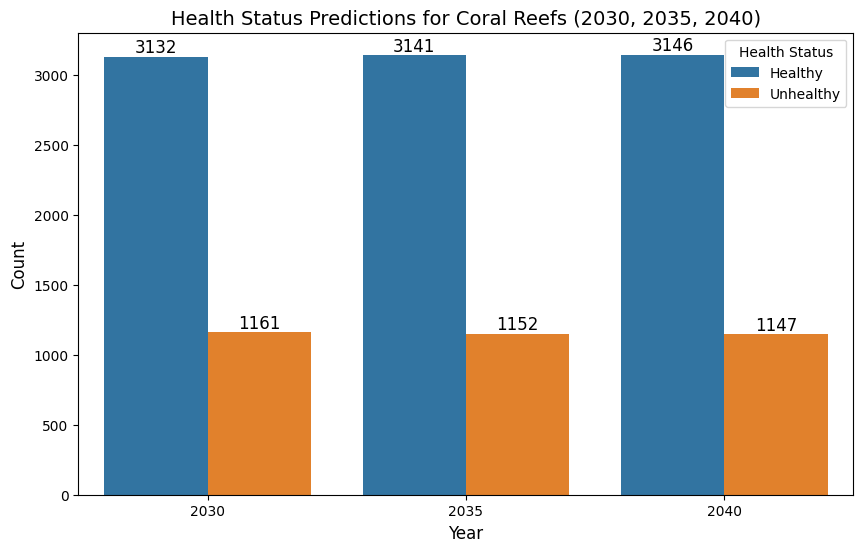

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace these values with your actual counts)
data = {
    'Year': ['2030', '2030', '2035', '2035', '2040', '2040'],
    'Health Status': ['Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy'],
    'Count': [healthy_count_2030, unhealthy_count_2030, healthy_count_2035, unhealthy_count_2035, healthy_count_2040, unhealthy_count_2040]
}

# Create DataFrame from the data
df = pd.DataFrame(data)

# Set the plot size
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
ax = sns.barplot(x='Year', y='Count', hue='Health Status', data=df)

# Add titles and labels
plt.title('Health Status Predictions for Coral Reefs (2030, 2035, 2040)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add numbers on top of the bars, skipping zero-height bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add labels for bars with a height greater than 0
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.0f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


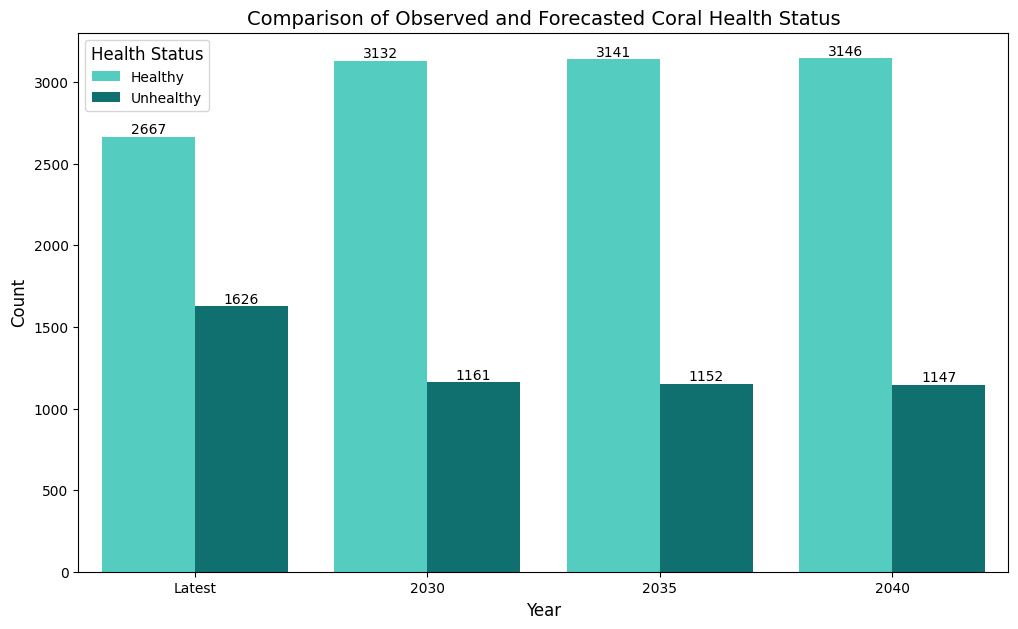

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count data from cleaned_data
healthy_classes = ['Fair', 'Good']
unhealthy_classes = ['Poor']

# Calculate counts for Healthy and Unhealthy categories
latest_healthy_count = cleaned_data[cleaned_data['hard_coral_class'].isin(healthy_classes)].shape[0]
latest_unhealthy_count = cleaned_data[cleaned_data['hard_coral_class'].isin(unhealthy_classes)].shape[0]

# Forecasted data (replace with actual counts)
forecasted_data = {
    'Year': ['2030', '2030', '2035', '2035', '2040', '2040'],
    'Health Status': ['Healthy', 'Unhealthy', 'Healthy', 'Unhealthy', 'Healthy', 'Unhealthy'],
    'Count': [3132, 1161, 3141, 1152, 3146, 1147],
    'Type': ['Forecasted'] * 6  # Label for forecasted data
}

# Latest observed data (from cleaned_data)
observed_data = {
    'Year': ['Latest', 'Latest'],
    'Health Status': ['Healthy', 'Unhealthy'],
    'Count': [2667, 1626],
    'Type': ['Observed'] * 2  # Label for observed data
}

# Combine both datasets into a single DataFrame
df_forecasted = pd.DataFrame(forecasted_data)
df_observed = pd.DataFrame(observed_data)
df_combined = pd.concat([df_forecasted, df_observed])

# Specify the custom order for the x-axis
custom_order = ['Latest', '2030', '2035', '2040']
df_combined['Year'] = pd.Categorical(df_combined['Year'], categories=custom_order, ordered=True)

# Set the plot size
plt.figure(figsize=(12, 7))

# Set a turquoise-green palette
palette = sns.color_palette(["#40E0D0", "#008080"])  # Custom turquoise and teal colors

# Create a bar plot using seaborn
ax = sns.barplot(
    x='Year', y='Count', hue='Health Status', data=df_combined, dodge=True,
    hue_order=['Healthy', 'Unhealthy'], palette=palette
)

# Add titles and labels
plt.title('Comparison of Observed and Forecasted Coral Health Status', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add numbers on top of the bars, skipping zero-height bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add labels for bars with a height greater than 0
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Customize the legend
plt.legend(title='Health Status', fontsize=10, title_fontsize=12)

# Show the plot
plt.show()


##slides code


In [ ]:
import pandas as pd

file_path = r"full_data_cleaned.csv"
cleaned_data = pd.read_csv(file_path)

In [ ]:
cleaned_data['hard_coral_class'].unique()

array(['Fair', 'Poor', 'Good'], dtype=object)

<ipython-input-3-098bc8d96f3f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


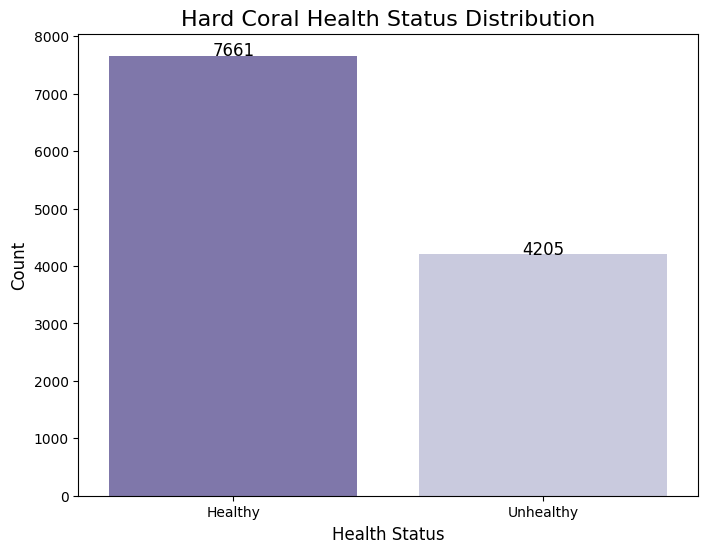

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cleaned_data' is your DataFrame with the 'hard_coral_class' column
# Recategorize the 'hard_coral_class' column
cleaned_data['Health Status'] = cleaned_data['hard_coral_class'].replace({
    'Good': 'Healthy',
    'Fair': 'Healthy',
    'Poor': 'Unhealthy'
})

# Count occurrences of each category
status_counts = cleaned_data['Health Status'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=status_counts.index,
    y=status_counts.values,
    palette=sns.color_palette("Purples_r", len(status_counts))
)

# Add numbers on top of the bars
for i, count in enumerate(status_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Add title and labels
plt.title('Hard Coral Health Status Distribution', fontsize=16)
plt.xlabel('Health Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Ensure the columns 'temperature_kelvin' and 'hard_coral' exist in the DataFrame
if 'temperature_kelvin' in cleaned_data.columns and 'hard_coral' in cleaned_data.columns:
    # Extract the relevant columns
    temperature_kelvin = cleaned_data['temperature_kelvin']
    hard_coral = cleaned_data['hard_coral']

    # Calculate the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(temperature_kelvin, hard_coral)

    print(f"The Pearson correlation coefficient between temperature_kelvin and hard_coral is: {correlation_coefficient}")
else:
    print("Columns 'temperature_kelvin' and 'hard_coral' are not in the DataFrame.")


The Pearson correlation coefficient between temperature_kelvin and hard_coral is: 0.17007247981977544


The Pearson correlation coefficient is: 0.17007247981977544


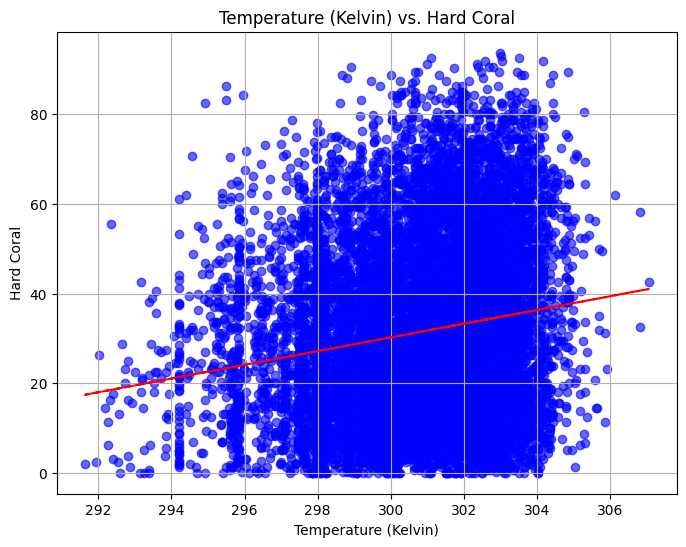

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np


# Ensure the columns 'temperature_kelvin' and 'hard_coral' exist
if 'temperature_kelvin' in cleaned_data.columns and 'hard_coral' in cleaned_data.columns:
    # Extract the relevant columns
    temperature_kelvin = cleaned_data['temperature_kelvin']
    hard_coral = cleaned_data['hard_coral']

    # Calculate the Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(temperature_kelvin, hard_coral)
    print(f"The Pearson correlation coefficient is: {correlation_coefficient}")

    # Plot the data as a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(temperature_kelvin, hard_coral, color='blue', alpha=0.6)
    plt.title('Temperature (Kelvin) vs. Hard Coral')
    plt.xlabel('Temperature (Kelvin)')
    plt.ylabel('Hard Coral')

    # Optionally, you can add a line of best fit using np.polyfit for visualization
    # Fit a line and plot it
    z = np.polyfit(temperature_kelvin, hard_coral, 1)
    p = np.poly1d(z)
    plt.plot(temperature_kelvin, p(temperature_kelvin), color='red', linestyle='--')

    plt.grid(True)
    plt.show()
else:
    print("Columns 'temperature_kelvin' and 'hard_coral' are not in the DataFrame.")


Correlation coefficient (r): 0.17007247981977536
R-squared (R²): 0.028924648392047895


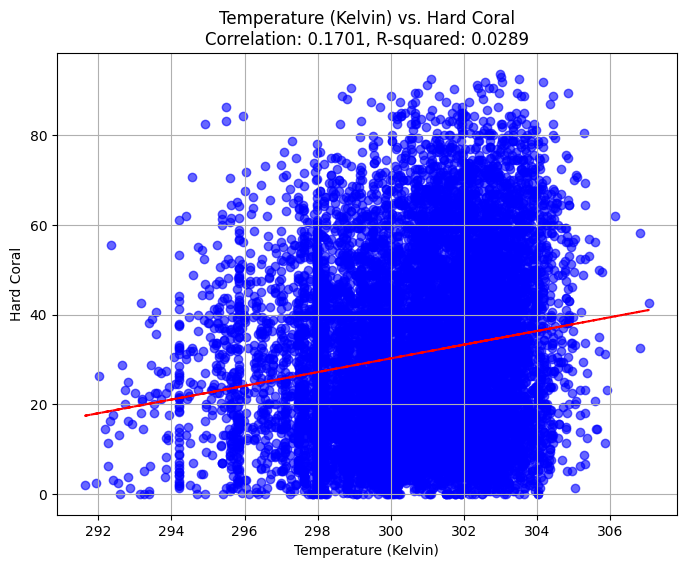

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import linregress


# Ensure the columns 'temperature_kelvin' and 'hard_coral' exist
if 'temperature_kelvin' in cleaned_data.columns and 'hard_coral' in cleaned_data.columns:
    # Extract the relevant columns
    temperature_kelvin = cleaned_data['temperature_kelvin']
    hard_coral = cleaned_data['hard_coral']

    # Perform linear regression to get slope, intercept, r-value, p-value, and standard error
    slope, intercept, r_value, p_value, std_err = linregress(temperature_kelvin, hard_coral)

    # Calculate R-squared
    r_squared = r_value ** 2

    print(f"Correlation coefficient (r): {r_value}")
    print(f"R-squared (R²): {r_squared}")

    # Plot the data as a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(temperature_kelvin, hard_coral, color='blue', alpha=0.6)
    plt.title(f'Temperature (Kelvin) vs. Hard Coral\nCorrelation: {r_value:.4f}, R-squared: {r_squared:.4f}')
    plt.xlabel('Temperature (Kelvin)')
    plt.ylabel('Hard Coral')

    # Add the regression line
    plt.plot(temperature_kelvin, slope * temperature_kelvin + intercept, color='red', linestyle='--')

    plt.grid(True)
    plt.show()
else:
    print("Columns 'temperature_kelvin' and 'hard_coral' are not in the DataFrame.")


In [ ]:
cleaned_data.columns


Index(['date', 'latitude_degrees', 'longitude_degrees', 'url', 'depth_m',
       'ocean_name', 'country_name', 'city_town_name', 'distance_to_shore',
       'exposure',
       ...
       'feature_25057', 'feature_25059', 'feature_25068', 'feature_25069',
       'feature_25075', 'feature_25078', 'feature_25079', 'feature_25082',
       'feature_25083', 'feature_25086'],
      dtype='object', length=1522)

In [ ]:
# List columns that do not start with 'features_'
filtered_columns = [col for col in cleaned_data.columns if not col.startswith('features_')]

# Display the filtered column names
print(filtered_columns)


['date', 'latitude_degrees', 'longitude_degrees', 'url', 'depth_m', 'ocean_name', 'country_name', 'city_town_name', 'distance_to_shore', 'exposure', 'turbidity', 'cyclone_frequency', 'date_day', 'date_month', 'date_year', 'bleaching_level', 'percent_bleaching', 'climsst', 'temperature_kelvin', 'temperature_mean', 'temperature_maximum', 'windspeed', 'ssta', 'ssta_minimum', 'ssta_maximum', 'ssta_frequency', 'ssta_frequencymax', 'ssta_dhw', 'tsa_minimum', 'tsa_frequency', 'tsa_dhwmax', 'mpa', 'iucn_category', '50reef_connpe', '50reef_cyclavg', '50reef_score', 'hard_coral', 'nutrient_indicator_algae', 'r', 'g', 'b', 'ecoregion', 'province', 'realm', 'hdi', 'overfishing', 'coastal_dev', 'marine_pollution', 'hard_coral_class', 'image_features', 'feature_13871', 'feature_13872', 'feature_14093', 'feature_14095', 'feature_14317', 'feature_14320', 'feature_14541', 'feature_14544', 'feature_14549', 'feature_14766', 'feature_14771', 'feature_14988', 'feature_14992', 'feature_15145', 'feature_1521

Correlation coefficient (r): 0.07989768814162754
R-squared (R²): 0.00638364057037677


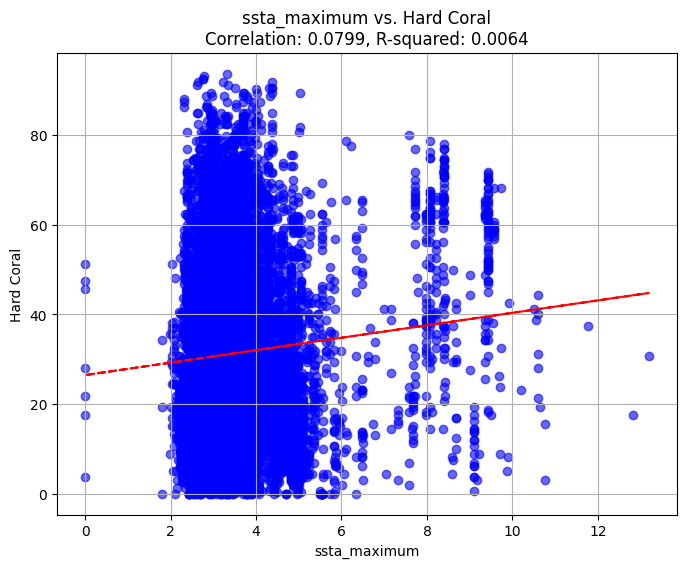

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import linregress


# Ensure the columns 'temperature_kelvin' and 'hard_coral' exist
if 'ssta_maximum' in cleaned_data.columns and 'hard_coral' in cleaned_data.columns:
    # Extract the relevant columns
    temperature_kelvin = cleaned_data['ssta_maximum']
    hard_coral = cleaned_data['hard_coral']

    # Perform linear regression to get slope, intercept, r-value, p-value, and standard error
    slope, intercept, r_value, p_value, std_err = linregress(temperature_kelvin, hard_coral)

    # Calculate R-squared
    r_squared = r_value ** 2

    print(f"Correlation coefficient (r): {r_value}")
    print(f"R-squared (R²): {r_squared}")

    # Plot the data as a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(temperature_kelvin, hard_coral, color='blue', alpha=0.6)
    plt.title(f'ssta_maximum vs. Hard Coral\nCorrelation: {r_value:.4f}, R-squared: {r_squared:.4f}')
    plt.xlabel('ssta_maximum')
    plt.ylabel('Hard Coral')

    # Add the regression line
    plt.plot(temperature_kelvin, slope * temperature_kelvin + intercept, color='red', linestyle='--')

    plt.grid(True)
    plt.show()
else:
    print("Columns 'ssta_maximum' and 'hard_coral' are not in the DataFrame.")


<ipython-input-22-64141a800d9f>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = cleaned_data['temperature_kelvin'].resample('M').mean()


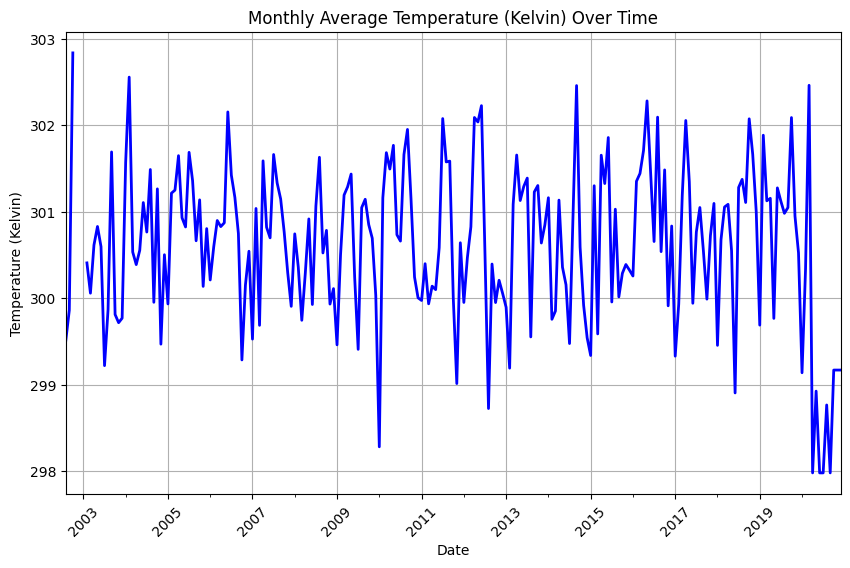

In [ ]:
# Ensure the 'date_column' is in datetime format (replace 'date_column' with the actual column name)
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Set the date column as the index (optional, but useful for time-based operations)
cleaned_data.set_index('date', inplace=True)

# Resample the data by month and compute the mean temperature_kelvin for each month
monthly_avg_temp = cleaned_data['temperature_kelvin'].resample('M').mean()

# Plot the aggregated temperature over time
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='line', color='blue', lw=2)
plt.title('Monthly Average Temperature (Kelvin) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Kelvin)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()

## new projected values

In [ ]:
import pandas as pd

file_path = r"rcp85_projections.csv"
data = pd.read_csv(file_path)

In [ ]:
data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'latitude_degrees',
       'longitude_degrees', 'date', 'depth_m', 'ocean_name', 'country_name',
       'city_town_name', 'distance_to_shore', 'exposure', 'turbidity',
       'cyclone_frequency', 'date_day', 'date_month', 'date_year',
       'bleaching_level', 'percent_bleaching', 'climsst', 'temperature_kelvin',
       'temperature_mean', 'temperature_maximum',
       'temperature_kelvin_standard_deviation', 'windspeed', 'ssta',
       'ssta_mean', 'ssta_minimum', 'ssta_maximum', 'ssta_frequency',
       'ssta_frequency_standard_deviation', 'ssta_frequencymax',
       'ssta_frequencymean', 'ssta_dhw', 'tsa_standard_deviation',
       'tsa_minimum', 'tsa_mean', 'tsa_frequency', 'tsa_frequencymean',
       'tsa_dhwmax', 'mpa', 'iucn_category', '50reef_connpe', '50reef_cyclavg',
       '50reef_cyclirt1', '50reef_score', 'hard_coral',
       'nutrient_indicator_algae', 'r', 'g', 'b', 'ecoregion', 'province',
       'realm', 'hdi', 'over

## regression

In [ ]:
import pandas as pd

file_path = r"bleaching_data.csv"
data = pd.read_csv(file_path)

In [ ]:
data

,Unnamed: 0,site_id,sample_id,data_source,latitude_degrees,longitude_degrees,ocean_name,reef_id,realm_name,ecoregion_name,...,tsa_frequencymean,tsa_dhw,tsa_dhw_standard_deviation,tsa_dhwmax,tsa_dhwmean,date,site_comments,sample_comments,bleaching_comments,bleaching_status
0,0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,...,0,0.00,0.74,7.25,0.18,2005-09-15,nd,nd,nd,bleaching
1,2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,...,0,0.00,1.04,11.66,0.26,2006-01-15,nd,nd,nd,bleaching
2,3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,...,0,0.00,0.75,5.64,0.20,2006-04-15,nd,nd,nd,bleaching
3,4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,...,0,0.00,0.92,6.89,0.25,2006-04-15,nd,nd,nd,bleaching
4,5,2180,10324021,Donner,9.8220,-75.8910,Atlantic,nd,Tropical Atlantic,Netherlands Antilles and south Caribbean,...,2,2.21,1.47,14.40,0.64,2005-08-15,nd,nd,nd,bleaching
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26847,35040,9436,10318964,Reef_Check,18.3350,-64.8486,Atlantic,64.50.55W.18.20.06N,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,...,0,6.22,0.71,6.21,0.20,2005-10-23,nd,nd,nd,bleaching
26848,35041,9436,10318964,Reef_Check,18.3350,-64.8486,Atlantic,64.50.55W.18.20.06N,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,...,0,6.22,0.71,6.21,0.20,2005-10-23,nd,nd,nd,bleaching
26849,35042,9835,10290574,McClanahan,-13.5002,47.8825,Indian,nd,Western Indo-Pacific,North Madagascar,...,1,4.44,0.91,6.25,0.31,2016-04-18,nd,Julien Leblond,nd,bleaching
26850,35043,12228,10274702,FRRP,24.5019,-81.6328,Atlantic,nd,Tropical Atlantic,Bahamas and Florida Keys,...,19,50.63,14.20,51.21,12.58,2015-09-10,nd,nd,nd,bleaching


In [ ]:
selected_columns = data[['turbidity', 'cyclone_frequency', 'temperature_kelvin',
                         'windspeed', 'ssta_minimum', 'ssta_maximum',
                         'bleaching_status']]
# no algae variable
selected_columns

,turbidity,cyclone_frequency,temperature_kelvin,windspeed,ssta_minimum,ssta_maximum,bleaching_status
0,0.0287,49.90,302.05,8.0,-3.56,2.24,bleaching
1,0.0429,61.52,299.18,8.0,-2.92,2.83,bleaching
2,0.0424,65.39,299.61,3.0,-2.77,2.47,bleaching
3,0.0424,65.39,299.70,3.0,-2.84,2.30,bleaching
4,0.0954,51.54,303.22,1.0,-4.06,2.73,bleaching
...,...,...,...,...,...,...,...
26847,0.0586,85.57,302.11,8.0,-2.86,2.34,bleaching
26848,0.0586,85.57,302.11,8.0,-2.86,2.34,bleaching
26849,0.0628,35.71,303.45,5.0,-3.26,2.50,bleaching
26850,0.1203,58.42,303.76,5.0,-4.85,6.20,bleaching


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert the 'bleaching_status' column to numeric using LabelEncoder
label_encoder = LabelEncoder()
selected_columns['bleaching_status'] = label_encoder.fit_transform(selected_columns['bleaching_status'])

# Define the target variable (bleaching_status) and feature variables (selected_columns)
X = selected_columns.drop(columns=['bleaching_status'])
y = selected_columns['bleaching_status']  # Target variable (bleaching_status)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

<ipython-input-7-ed234d00356b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['bleaching_status'] = label_encoder.fit_transform(selected_columns['bleaching_status'])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5544591323775833
Confusion Matrix:
[[ 208  130]
 [2263 2770]]
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.62      0.15       338
           1       0.96      0.55      0.70      5033

    accuracy                           0.55      5371
   macro avg       0.52      0.58      0.42      5371
weighted avg       0.90      0.55      0.66      5371



# slides

In [ ]:
import pandas as pd

file_path = r"global_bleaching_environmental.csv"
data = pd.read_csv(file_path, low_memory=False)

In [ ]:
data['Percent_Bleaching']


,Percent_Bleaching
0,50.2
1,50.7
2,50.9
3,50.9
4,50.9
...,...
41356,nd
41357,nd
41358,nd
41359,nd


In [ ]:
data = data[data['Percent_Bleaching'] != 'nd']
data

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.5750,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35040,9436,10318964,Reef_Check,18.3350,-64.8486,Atlantic,64.50.55W.18.20.06N,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,6.22,0.71,6.21,0.2,2005-10-23,nd,nd,nd
35041,9436,10318964,Reef_Check,18.3350,-64.8486,Atlantic,64.50.55W.18.20.06N,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,6.22,0.71,6.21,0.2,2005-10-23,nd,nd,nd
35042,9835,10290574,McClanahan,-13.5002,47.8825,Indian,nd,Western Indo-Pacific,North Madagascar,Madagascar,...,5,1,4.44,0.91,6.25,0.31,2016-04-18,nd,Julien Leblond,nd
35043,12228,10274702,FRRP,24.5019,-81.6328,Atlantic,nd,Tropical Atlantic,Bahamas and Florida Keys,United States,...,26,19,50.63,14.2,51.21,12.58,2015-09-10,nd,nd,nd


In [ ]:
# Convert to numeric and set errors='coerce' to handle non-numeric values
data['Percent_Bleaching'] = pd.to_numeric(data['Percent_Bleaching'], errors='coerce')

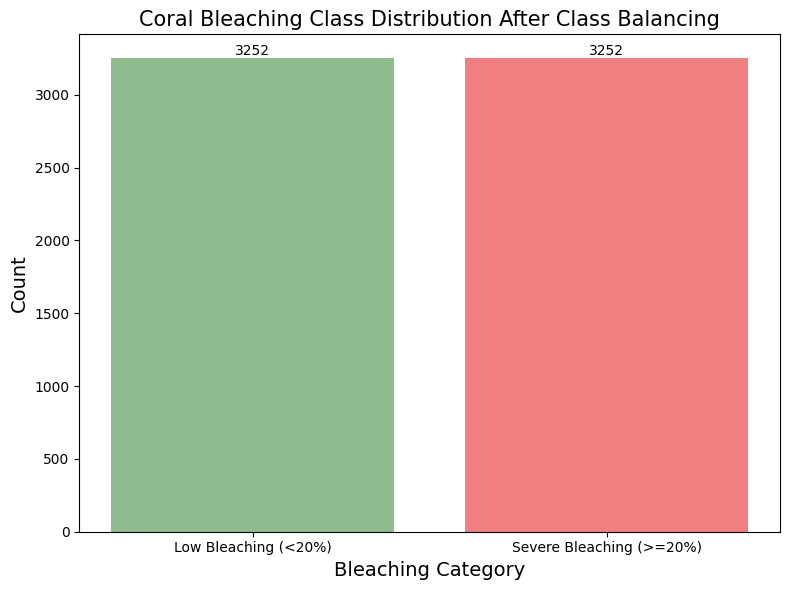

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar chart with new threshold (20%)
bleaching_categories = ['Low Bleaching (<20%)', 'Severe Bleaching (>=20%)']
percent_values = [3252, 3252]

# Create the bar chart with different shades of blue
plt.figure(figsize=(8,6))
bars = plt.bar(bleaching_categories, percent_values, color=['#8FBC8F', '#F08080'])  # Light blue and darker blue

# Adding the numbers on top of the bars in black with a smaller font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10, color='black')  # smaller font size

# Adding labels and title
plt.xlabel('Bleaching Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Coral Bleaching Class Distribution After Class Balancing', fontsize=15)  # Updated title

# Remove rotation for x-axis labels (default is no rotation)
plt.xticks(rotation=0)

plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-3-35dfedaa58d5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


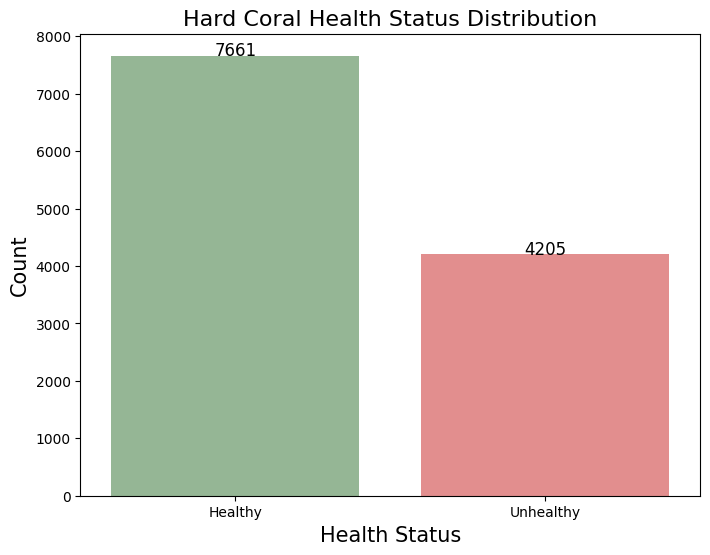

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Given counts for "Healthy" and "Unhealthy"
counts = [7661, 4205]
categories = ['Healthy', 'Unhealthy']

# Plot a bar chart with custom colors for Healthy (green) and Unhealthy (red)
plt.figure(figsize=(8, 6))
sns.barplot(
    x=categories,
    y=counts,
    palette={'Healthy': '#8FBC8F', 'Unhealthy': '#F08080'}  # Custom colors
)

# Add numbers on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Add title and labels
plt.title('Hard Coral Health Status Distribution', fontsize=16)
plt.xlabel('Health Status', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Display the plot
plt.show()
